# Noise Reduction

## Introduction

Noise reduction is a crucial signal processing technique used to enhance the quality of signals by minimizing unwanted or irrelevant noise. This technique finds applications in various fields such as audio processing, image processing, telecommunications, and more. The goal is to extract the useful information from a signal while suppressing undesirable background noise.


In [1]:
import mlrun

## Setting up a project

First of all we need to create a project with the `noise-reduction` function

In [7]:
# Creating a project
project = mlrun.get_or_create_project("noise-reduction")
# Importing the function from hub
noise_reduction_function = project.set_function("hub://noise_reduction")

> 2024-01-02 10:59:01,489 [info] Project loaded successfully: {'project_name': 'noise-reduction'}


In [9]:
# Audio source can be either a single file or a directory of audio files
audio_source = "<path/to/source>"

## Types of Noise Reduction Techniques

### 1. DeepFilterNet

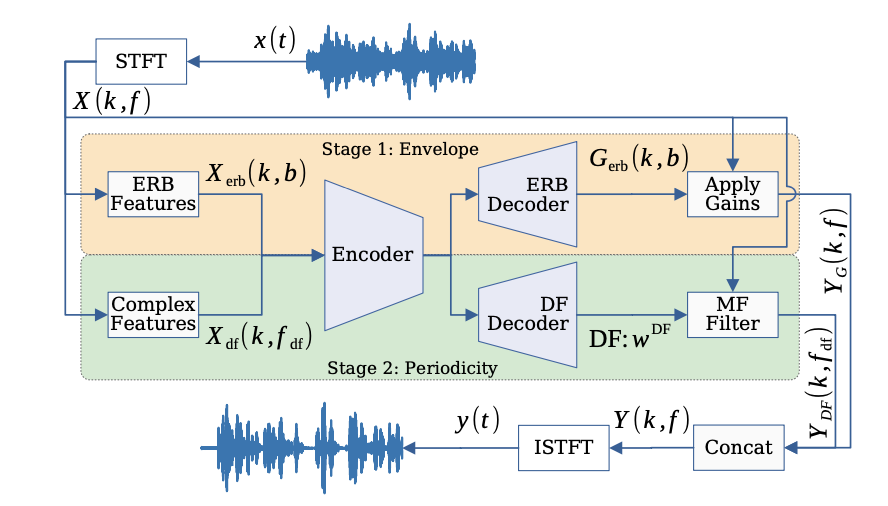

In order to use this technique, you simply need to use the `reduce_noise_dfn` handler.

Reduce noise from audio files using DeepFilterNet. Notice that the saved files are in WAV format, even if the original files are in another format.

- **audio_source:** Path to the audio file or directory of audio files.
- **target_directory:** Path to the target directory to save cleaned audio files.
- **pad:** Whether to pad the audio file with zeros before cleaning.
- **atten_lim_db:** Maximum attenuation in dB.
- **kwargs:** Additional arguments to pass to [torchaudio.load()](https://pytorch.org/audio/stable/generated/torchaudio.load.html).

In the examples below, the function is running locally, for running remotely, it is required to build the function's image first (need to execute only once):
```python
noise_reduction_function.apply(mlrun.auto_mount()) # required for local files
project.build_function("noise-reduction")
```

#### 1.1. Example

In [12]:
dfn_run = noise_reduction_function.run(
    handler="reduce_noise_dfn",
    inputs={"audio_source": audio_source},
    params={
        "target_directory": "./clean_data",
        "atten_lim_db": 50,
    },
    returns=["audio_files: path"],
    local = True,
)

> 2024-01-02 11:11:32,694 [info] Storing function: {'name': 'noise-reduction-reduce-noise-dfn', 'uid': '6f57a3631af44446ad9b13a5bf6215f2', 'db': 'http://mlrun-api:8080'}


`torchaudio.backend.common.AudioMetaData` has been moved to `torchaudio.AudioMetaData`. Please update the import path.


2024-01-02 11:12:10 | INFO     | DF | Running on torch 2.1.0+cu121
2024-01-02 11:12:10 | INFO     | DF | Running on host jupyter-yoni-8444448d86-6sb6z
2024-01-02 11:12:10 | INFO     | DF | Loading model settings of DeepFilterNet3
2024-01-02 11:12:10 | INFO     | DF | Using DeepFilterNet3 model at /igz/.cache/DeepFilterNet/DeepFilterNet3
2024-01-02 11:12:10 | INFO     | DF | Initializing model `deepfilternet3`
2024-01-02 11:12:11 | INFO     | DF | Found checkpoint /igz/.cache/DeepFilterNet/DeepFilterNet3/checkpoints/model_120.ckpt.best with epoch 120
2024-01-02 11:12:11 | INFO     | DF | Running on device cpu
2024-01-02 11:12:11 | INFO     | DF | Model loaded


Cleaning audio files:   0%|          | 0/1 [00:00<?, ?it/s]2024-01-02 11:12:11 | WARNING  | DF | Audio sampling rate does not match model sampling rate (16000, 48000). Resampling...
"sinc_interpolation" resampling method name is being deprecated and replaced by "sinc_interp_hann" in the next release. The default behavior remains unchanged.
Cleaning audio files: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
noise-reduction,...bf6215f2,0,Jan 02 11:11:32,completed,noise-reduction-reduce-noise-dfn,v3io_user=yonatankind=owner=yonatanhost=jupyter-yoni-8444448d86-6sb6z,audio_source,target_directory=./clean_dataatten_lim_db=50,,audio_files


> 2024-01-02 11:12:12,529 [info] Run execution finished: {'status': 'completed', 'name': 'noise-reduction-reduce-noise-dfn'}


The output of this function is the path to the directory containing all the enhanced audio files.
You can simply download it by using:
>```python
dfn_run.artifact("audio_files").local()
```

### 2. Spectral Gating
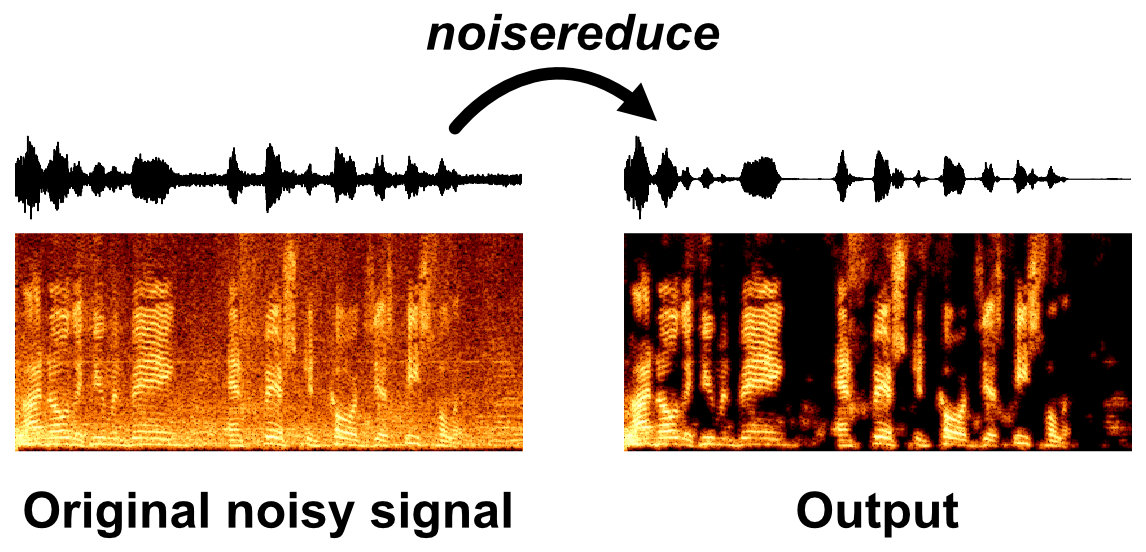

In order to use this technique, you simply need to use the `reduce_noise` handler.

Spectral gating selectively filters signal frequencies based on amplitude, offering targeted noise reduction or feature enhancement in signal processing applications.

Reduce noise from audio file or directory (in .wav format). Cleaned files saved in target_directory. 
For algorithm details, visit [noisereduce GitHub](https://github.com/timsainb/noisereduce).

- **audio_source:** Path to audio file or directory containing audio files.
- **target_directory:** Path to save cleaned audio files.
- **sample_rate:** Number of samples per second. Use None to keep the original sample rate.
- **duration:** Duration of the audio file to clean in seconds. Use None to keep the original duration.
- **channel:** Channel to clean. Pass the number of the channel to clean. To clean all channels pass None.

#### 2.1. Example

In [15]:
noise_reduction_run = noise_reduction_function.run(
    handler="reduce_noise",
    inputs={"audio_source": audio_source},
    params={
        "target_directory": "./clean_data",
        "sample_rate": None,
    },
    local=True,
    returns=["audio_files: path"],
)

> 2024-01-02 11:19:53,770 [info] Storing function: {'name': 'noise-reduction-reduce-noise', 'uid': '2a9581dc7d39448798f96449c3996f85', 'db': 'http://mlrun-api:8080'}


Cleaning audio files: 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
noise-reduction,...c3996f85,0,Jan 02 11:19:53,completed,noise-reduction-reduce-noise,v3io_user=yonatankind=owner=yonatanhost=jupyter-yoni-8444448d86-6sb6z,audio_source,target_directory=./clean_datasample_rate=None,,audio_files


> 2024-01-02 11:19:56,169 [info] Run execution finished: {'status': 'completed', 'name': 'noise-reduction-reduce-noise'}


The output of this function is the same as the first one.